In [84]:
# Homework 9 - The first task for this homework was to build a chart using data from two seperate sources and plot the data using correlation, linear regression or another technique.

In [85]:
# The first data source I will use is presidential polling data for Barack Obama, which I will scrape using pandas from Rasmussen Reports 

In [86]:
import pandas as pd

Obama_Approval = pd.read_html('https://www.rasmussenreports.com/public_content/politics/obama_administration/obama_approval_index_history')

# Loading and cleaning the data 

DF_Obama_Approval = Obama_Approval[0]

DF_Obama_Approval["Date"] = pd.to_datetime(DF_Obama_Approval["Date"])
DF_Obama_Approval['Total Approve'] = DF_Obama_Approval['Total Approve'].str.replace('%',' ')
DF_Obama_Approval['Total Approve'] = pd.to_numeric(DF_Obama_Approval['Total Approve'], errors ='coerce')
DF_Obama_Approval.dropna(subset = ["Total Approve"], inplace=True)

# Creating Weekly averages for presidential approval

DF_Obama_Approval_Weekly = DF_Obama_Approval.resample('W', on='Date').mean().reset_index()

# The date will reflect the average presidential approval of the previous week 

import datetime

# off-setting the day by 1 so the weekly average of the previous week is reflected on the monday of the next week.
# (This is so the data can be merged with the FRED data, which has a weekly frequency ending Monday)

DF_Obama_Approval_Weekly['Date'] = pd.DatetimeIndex(DF_Obama_Approval_Weekly['Date']) + pd.DateOffset(1)

# Renaming Columns 

DF_Obama_Approval_Weekly.columns = ['Date','Barack Obama Presidential Approval (%)']

DF_Obama_Approval_Weekly


,Date,Barack Obama Presidential Approval (%)
0,2008-11-10,53.750000
1,2008-11-17,58.142857
2,2008-11-24,60.857143
3,2008-12-01,61.000000
4,2008-12-08,66.142857
...,...,...
424,2016-12-26,55.200000
425,2017-01-02,54.750000
426,2017-01-09,57.500000
427,2017-01-16,59.600000


In [87]:
# The second data set I will use is the weekly 'US All Grades All Formulations Gasoline Price', which I will download from the Fred API.

In [88]:
# Importing the required packages to download the data from the api.

import requests

import os 

import json

from google.colab import files

In [89]:
# Downloading the Json file from th Fred api and loading it into a pandas data frame 

url = 'https://api.stlouisfed.org/fred/series/observations?series_id=GASALLW&api_key=e725511ce5615fe46441618aca9c09bf&file_type=json'

data = requests.get(url)

Retail_Gasoline_Consumer_Price = data.json()

Observations = Retail_Gasoline_Consumer_Price['observations']

Retail_Gasoline_Consumer_Price_Array=[]

for x in Observations:
  temp_variable={'date':x['date'],'value':x['value']}
  Retail_Gasoline_Consumer_Price_Array.append(temp_variable)

DF_Retail_Gasoline_Price  = pd.DataFrame(Retail_Gasoline_Consumer_Price_Array)

# Adding New Column Names 

DF_Retail_Gasoline_Price.columns = ['Date','Retail Price of Gasoline (Dollars per Gallon)']

# Formatting Dates

DF_Retail_Gasoline_Price['Date'] = pd.to_datetime(DF_Retail_Gasoline_Price['Date'])

# Formatting Price Index

DF_Retail_Gasoline_Price['Retail Price of Gasoline (Dollars per Gallon)'] = pd.to_numeric(DF_Retail_Gasoline_Price['Retail Price of Gasoline (Dollars per Gallon)'], errors ='coerce')

DF_Retail_Gasoline_Price

,Date,Retail Price of Gasoline (Dollars per Gallon)
0,1993-04-05,1.068
1,1993-04-12,1.079
2,1993-04-19,1.079
3,1993-04-26,1.086
4,1993-05-03,1.086
...,...,...
1494,2021-11-22,3.493
1495,2021-11-29,3.478
1496,2021-12-06,3.440
1497,2021-12-13,3.414


In [90]:
# Merging the data from the two data sources to create a single data set 

DF_Obama_Approval_Weekly_With_Gasoline_Prices = DF_Obama_Approval_Weekly.merge(DF_Retail_Gasoline_Price, left_on='Date', right_on='Date')

DF_Obama_Approval_Weekly_With_Gasoline_Prices


,Date,Barack Obama Presidential Approval (%),Retail Price of Gasoline (Dollars per Gallon)
0,2008-11-10,53.750000,2.284
1,2008-11-17,58.142857,2.132
2,2008-11-24,60.857143,1.952
3,2008-12-01,61.000000,1.870
4,2008-12-08,66.142857,1.758
...,...,...,...
424,2016-12-26,55.200000,2.419
425,2017-01-02,54.750000,2.485
426,2017-01-09,57.500000,2.496
427,2017-01-16,59.600000,2.467


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


y =  -2.89  * x +  57.63
R² =  0.18


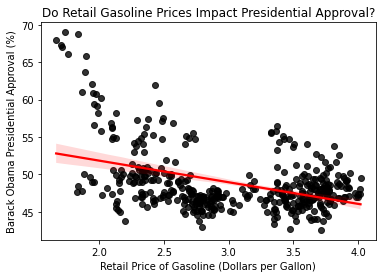

In [98]:
# Regressing Presidential Approval (Weekly Average) on the weekly Retail Price Price of Gasoline 

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x = DF_Obama_Approval_Weekly_With_Gasoline_Prices['Retail Price of Gasoline (Dollars per Gallon)']

y = DF_Obama_Approval_Weekly_With_Gasoline_Prices['Barack Obama Presidential Approval (%)']

tips = sns.load_dataset("tips")
ax = sns.regplot(x, y, data=tips, scatter_kws={"color": "black"}, line_kws={"color": "red"}).set_title('Do Retail Gasoline Prices Impact Presidential Approval?')

# Calculating a regression equation and R^2 

from scipy.stats import linregress
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
print('y = ',np.round(slope,2),' * x + ',np.round(intercept,2))
print('R² = ',np.round(rvalue**2,2))

# Saving the plot as an image

plt.savefig('Homework9_Advanced_Analytics.png')